## Test output .nc


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [ ]:
#file_name = '/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/pcrglobwb_20250930_091104/netcdf/channelStorage_dailyTot_output.nc' 

file_name = '/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/pcrglobwb_20250930_143633/netcdf/channelStorage_dailyTot_output.nc'
file_name_2 = ''

In [18]:
ds_1 = xr.open_dataset(file_name)
print(ds_1)


<xarray.Dataset> Size: 1MB
Dimensions:          (time: 4, lat: 216, lon: 324)
Coordinates:
  * time             (time) datetime64[ns] 32B 2010-06-01 ... 2010-06-04
  * lat              (lat) float32 864B 51.96 51.88 51.79 ... 34.21 34.12 34.04
  * lon              (lon) float32 1kB 53.04 53.12 53.21 ... 79.79 79.88 79.96
Data variables:
    channel_storage  (time, lat, lon) float32 1MB ...
Attributes:
    description:  by Edwin H. Sutanudjaja (contact: e.h.sutanudjaja@uu.nl)
    institution:  Department of Physical Geography, Utrecht University
    title:        PCR-GLOBWB 2 output (not coupled to MODFLOW)


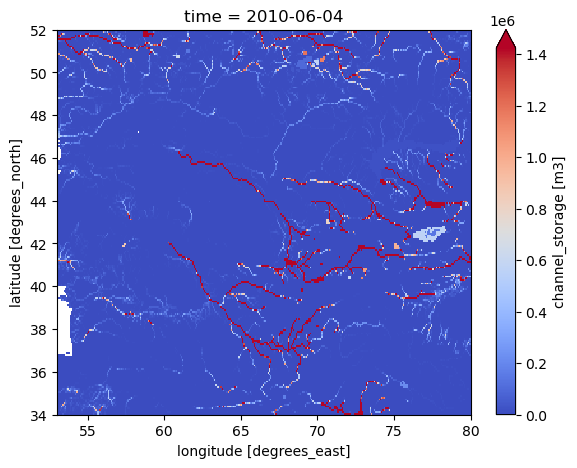

In [19]:
# get the first variable name
first_var = list(ds_1.data_vars)[0]

# select that variable and last timestep
da_1 = ds_1[first_var].isel(time=-1)


#da_1 = ds_1[0].isel(time =-1)


da_1.plot(cmap="coolwarm", robust=True, size=5)

#plt.title(str(da["valid_time"].values))  # extract timestamp from coords
#plt.savefig('ERA5_pr_1988-12-22_21UTC.png')
plt.show()

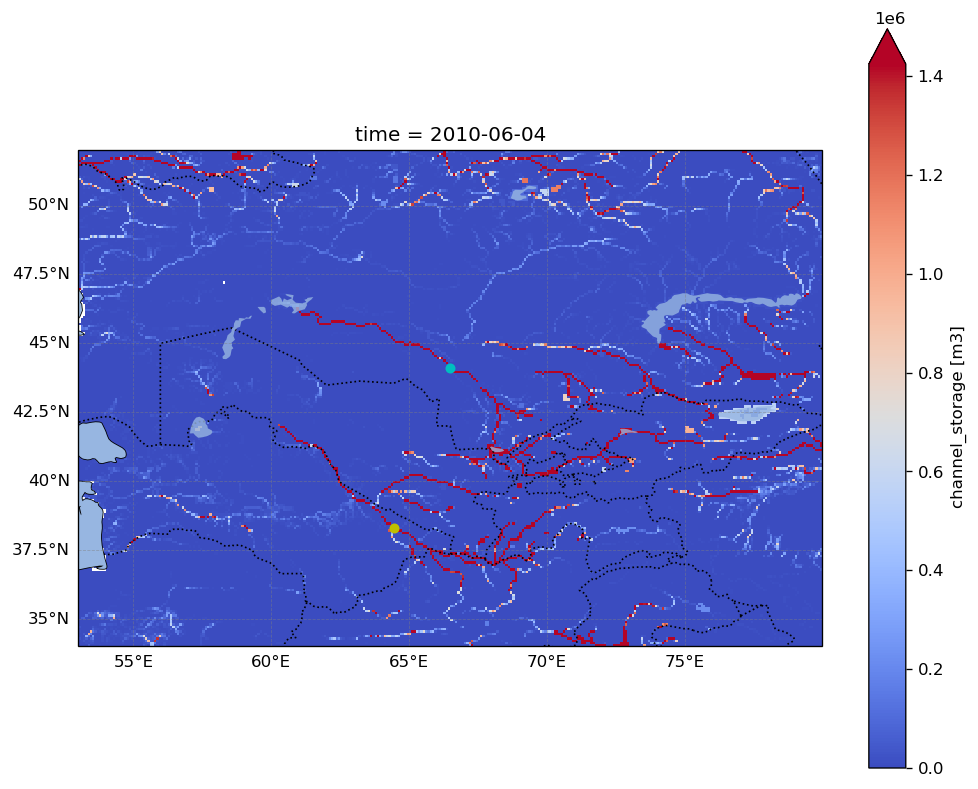

In [20]:


# Figure
fig = plt.figure(figsize=(10, 8), dpi=120)
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

da_1.plot(ax=ax, cmap="coolwarm", robust=True)
# Add features
ax.add_feature(cfeature.OCEAN, zorder=2)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAKES, alpha=0.8)
ax.add_feature(cfeature.COASTLINE)

ax.scatter(64.47358098132075, 38.27886233967275, s=25, c="y", label = "Amu_extraction")
ax.scatter(66.50162231337735, 44.10221360453554, s=25, c="c", label = "Syr_extraction")

#38.27886233967275, 64.47358098132075
#44.10221360453554, 66.50162231337735


# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False

# Legend


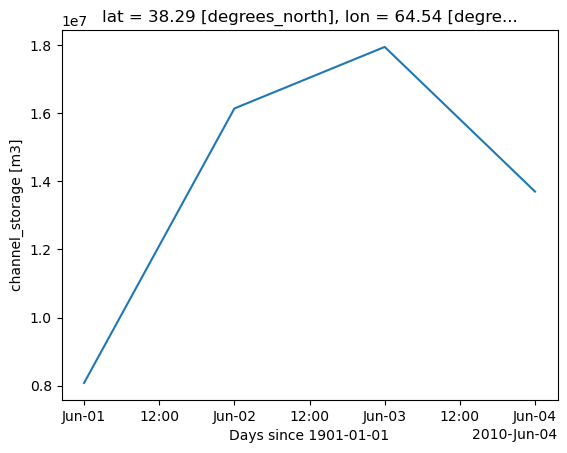

In [21]:
da_slice = ds_1[first_var].sel(lat=38.3,lon=64.5, method="nearest")
da_slice.plot()

In [15]:
import glob

files = glob.glob("/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/pcrglobwb_20250928_000524/netcdf/*.nc")  # alle .nc bestanden in folder
all_data = []

for f in files:
    ds = xr.open_dataset(f)
    data = list(ds.data_vars.values())[0]  # pak de enige variabele
    all_data.append(data)

In [118]:
all_data

[<xarray.DataArray 'groundwater_recharge' (time: 5844, lat: 216, lon: 324)> Size: 2GB
 [408986496 values with dtype=float32]
 Coordinates:
   * time     (time) datetime64[ns] 47kB 2004-01-01 2004-01-02 ... 2019-12-31
   * lat      (lat) float32 864B 51.96 51.88 51.79 51.71 ... 34.21 34.12 34.04
   * lon      (lon) float32 1kB 53.04 53.12 53.21 53.29 ... 79.79 79.88 79.96
 Attributes:
     standard_name:  groundwater_recharge
     long_name:      groundwater_recharge
     units:          m.day-1,
 <xarray.DataArray 'groundwater_storage' (time: 5844, lat: 216, lon: 324)> Size: 2GB
 [408986496 values with dtype=float32]
 Coordinates:
   * time     (time) datetime64[ns] 47kB 2004-01-01 2004-01-02 ... 2019-12-31
   * lat      (lat) float32 864B 51.96 51.88 51.79 51.71 ... 34.21 34.12 34.04
   * lon      (lon) float32 1kB 53.04 53.12 53.21 53.29 ... 79.79 79.88 79.96
 Attributes:
     standard_name:  groundwater_storage
     long_name:      non_fossil_groundwater_storage
     units:         

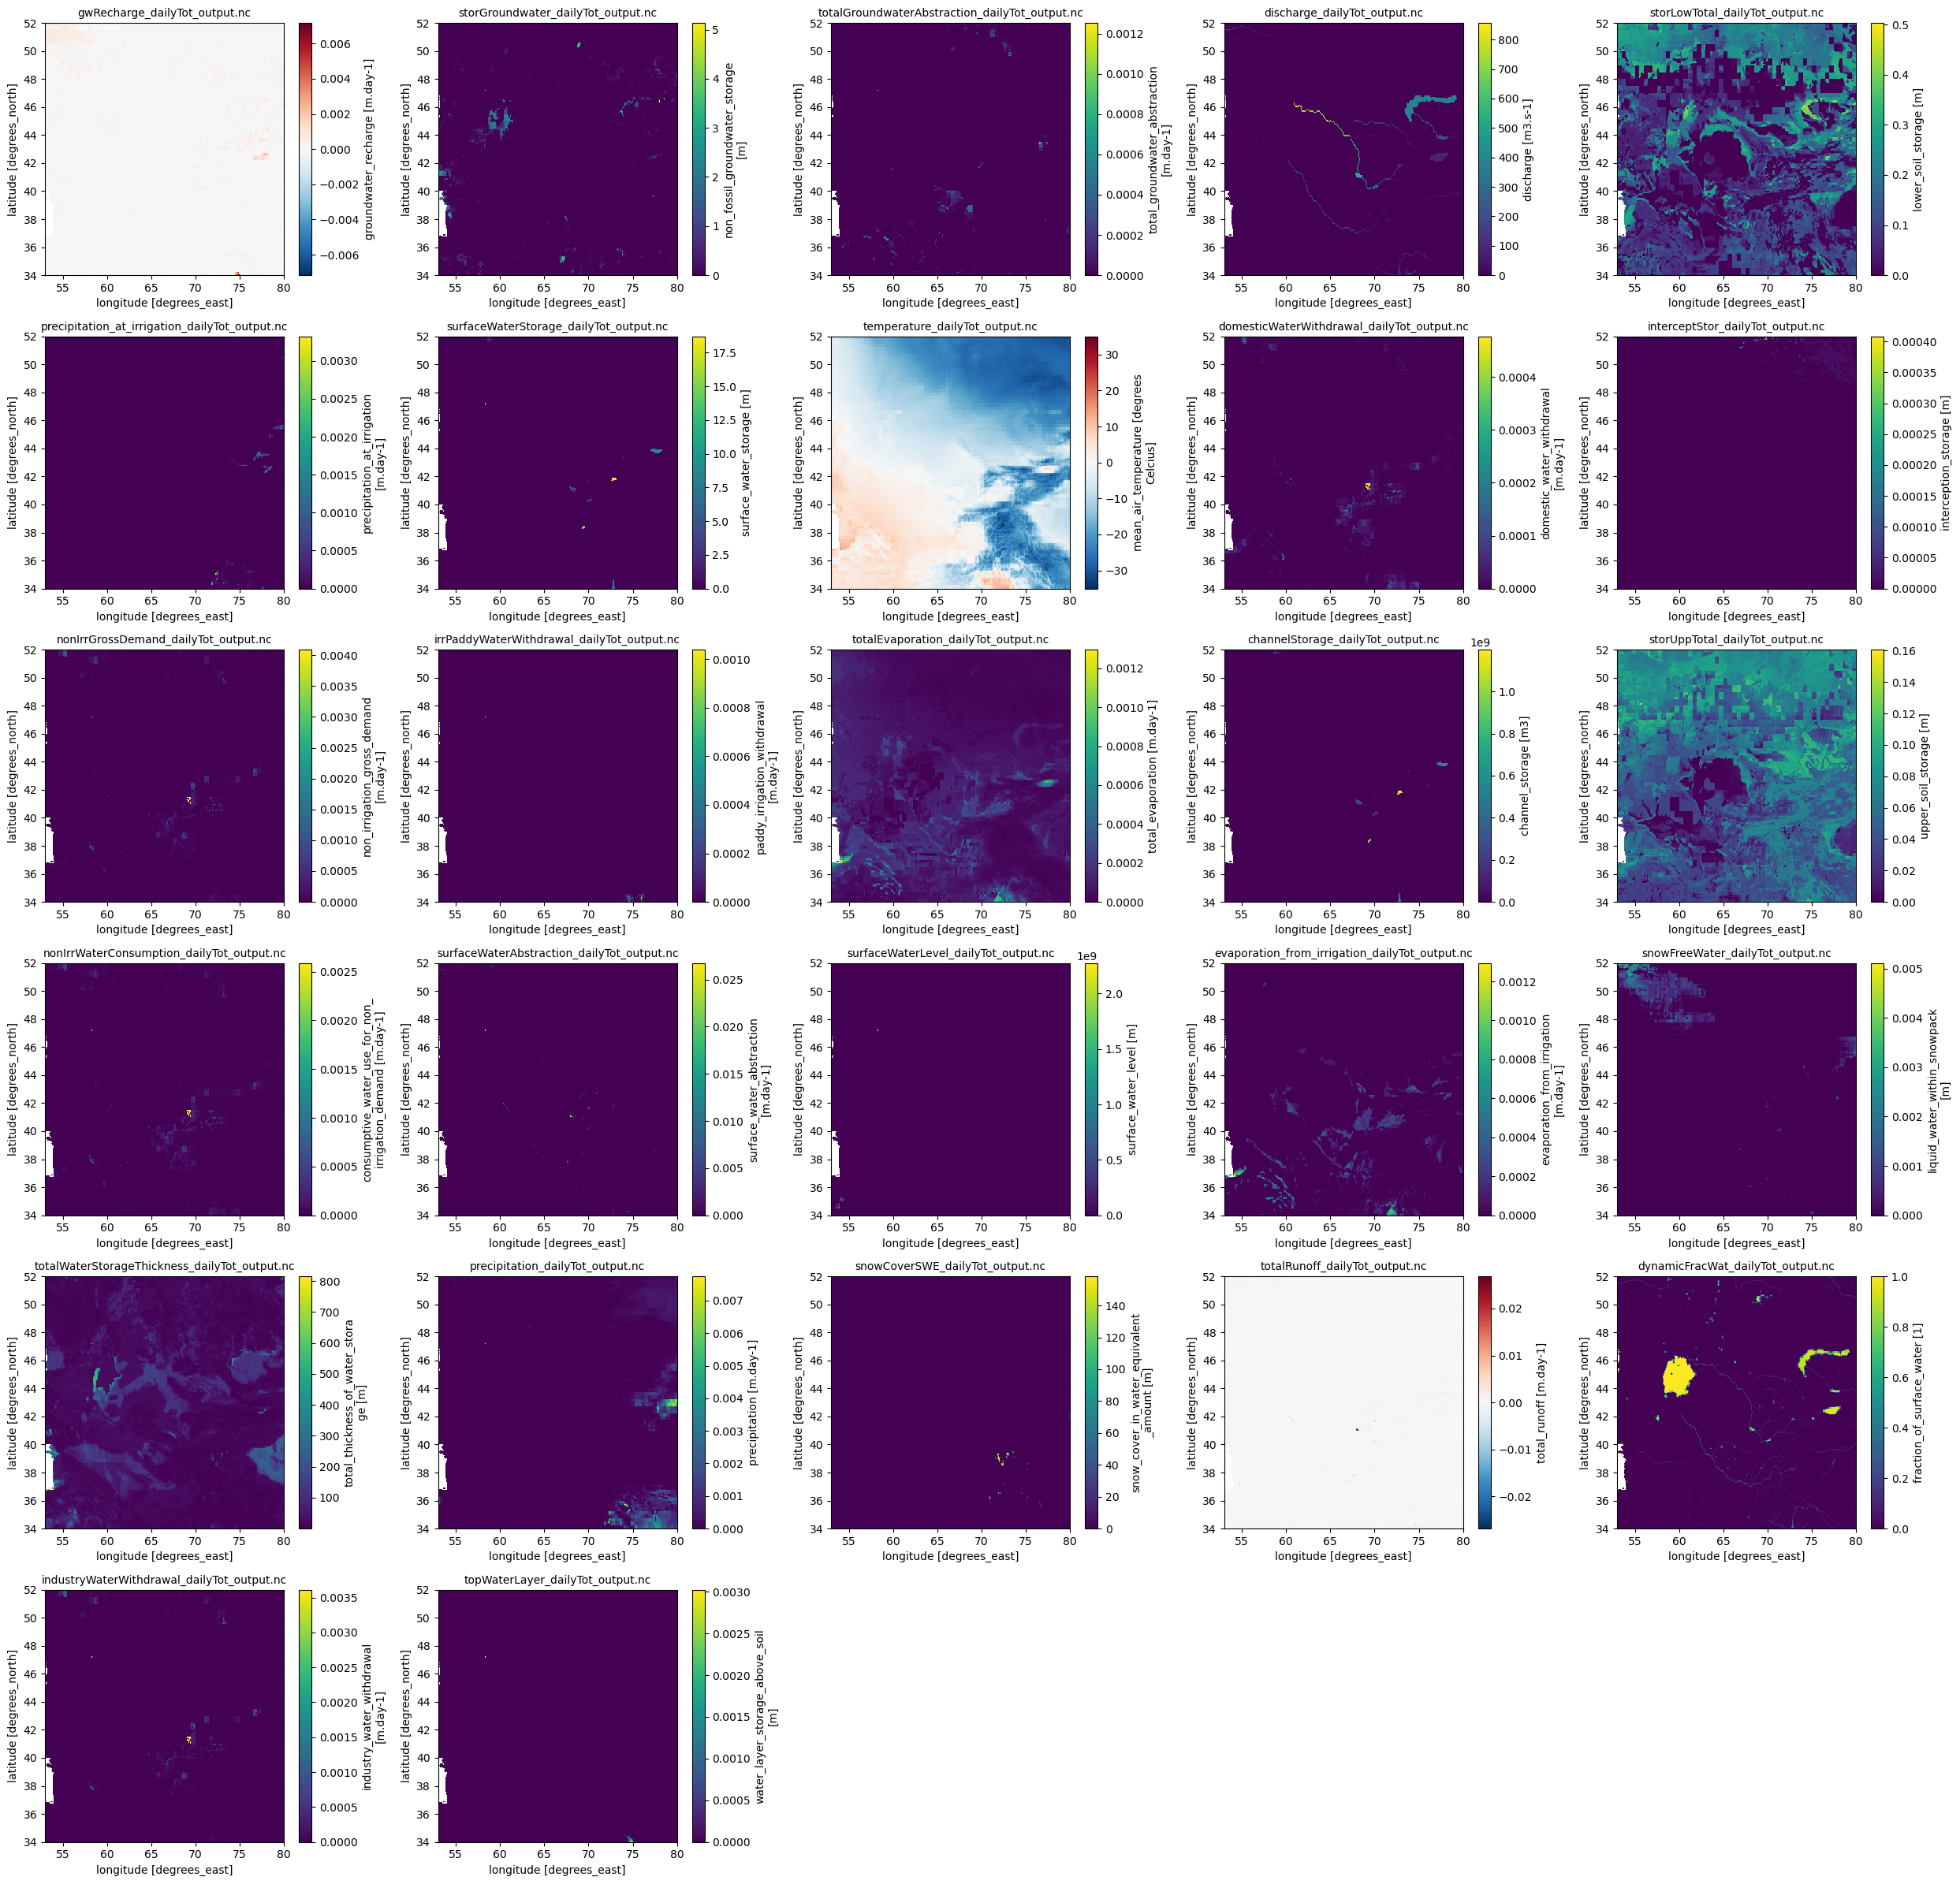

In [31]:
import xarray as xr
import matplotlib.pyplot as plt
import glob
import math

# 1️⃣ Pak alle .nc bestanden
files = glob.glob("/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/pcrglobwb_20250929_222610/netcdf/*.nc")  # alle .nc bestanden in folder
n_files = len(files)

# 2️⃣ Bepaal grid grootte
ncols = 5
nrows = math.ceil(n_files / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))

# flatten axes array voor makkelijke iteratie
axes = axes.flatten()

# 3️⃣ Loop over bestanden en plot laatste timestep
for ax, f in zip(axes, files):
    ds = xr.open_dataset(f)
    data = list(ds.data_vars.values())[0]  # pak de enige variabele
    last_timestep = data.isel(time=-1)     # laatste timestep
    last_timestep.plot(ax=ax)
    ax.set_title(f.split("/")[-1], fontsize=10)

# 4️⃣ Verwijder lege subplots als er minder bestanden dan subplots zijn
for ax in axes[n_files:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

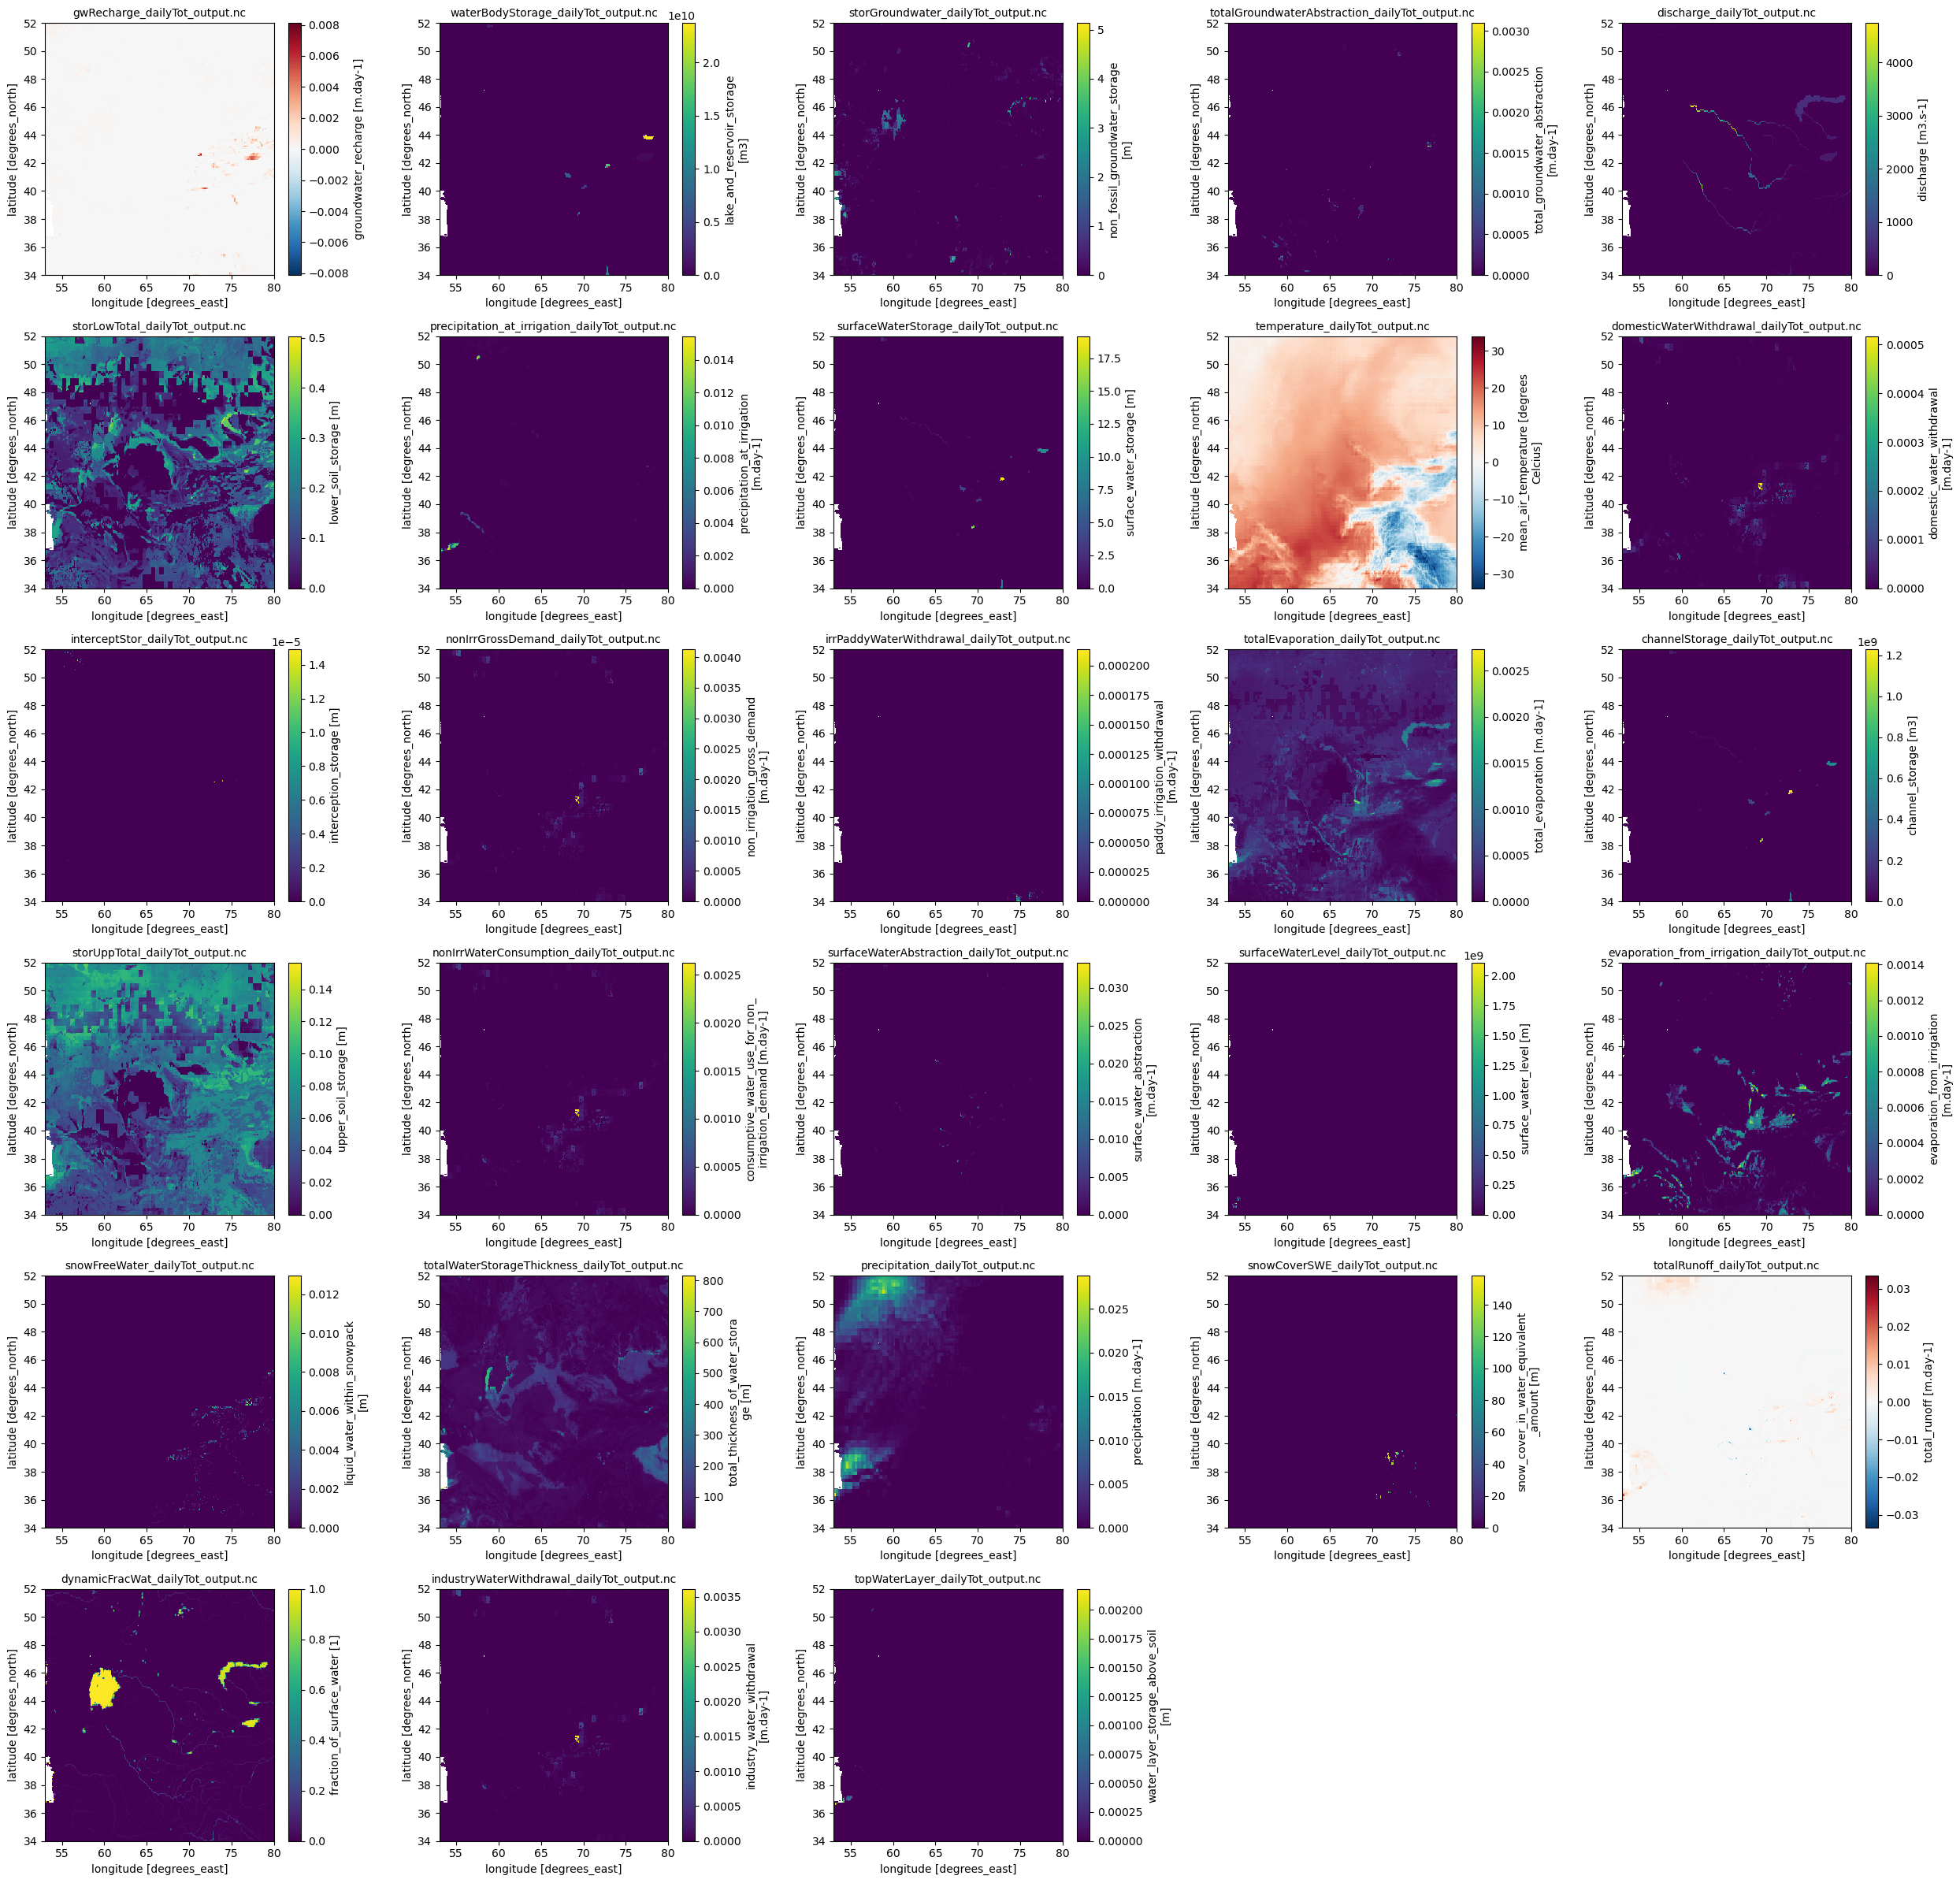

In [32]:
files = glob.glob("/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/pcrglobwb_20250930_003714/netcdf/*.nc")  # alle .nc bestanden in folder
n_files = len(files)

# 2️⃣ Bepaal grid grootte
ncols = 5
nrows = math.ceil(n_files / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))

# flatten axes array voor makkelijke iteratie
axes = axes.flatten()

# 3️⃣ Loop over bestanden en plot laatste timestep
for ax, f in zip(axes, files):
    ds = xr.open_dataset(f)
    data = list(ds.data_vars.values())[0]  # pak de enige variabele
    last_timestep = data.isel(time=-1)     # laatste timestep
    last_timestep.plot(ax=ax)
    ax.set_title(f.split("/")[-1], fontsize=10)

# 4️⃣ Verwijder lege subplots als er minder bestanden dan subplots zijn
for ax in axes[n_files:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [33]:
file2 = '/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/pcrglobwb_20250930_003714/netcdf/waterBodyStorage_dailyTot_output.nc' 

In [34]:
ds_lake = xr.open_dataset(file2)
print(ds_lake)


<xarray.Dataset> Size: 17MB
Dimensions:                     (time: 61, lat: 216, lon: 324)
Coordinates:
  * time                        (time) datetime64[ns] 488B 2010-09-01 ... 201...
  * lat                         (lat) float32 864B 51.96 51.88 ... 34.12 34.04
  * lon                         (lon) float32 1kB 53.04 53.12 ... 79.88 79.96
Data variables:
    lake_and_reservoir_storage  (time, lat, lon) float32 17MB ...
Attributes:
    description:  by Edwin H. Sutanudjaja (contact: e.h.sutanudjaja@uu.nl)
    institution:  Department of Physical Geography, Utrecht University
    title:        PCR-GLOBWB 2 output (not coupled to MODFLOW)


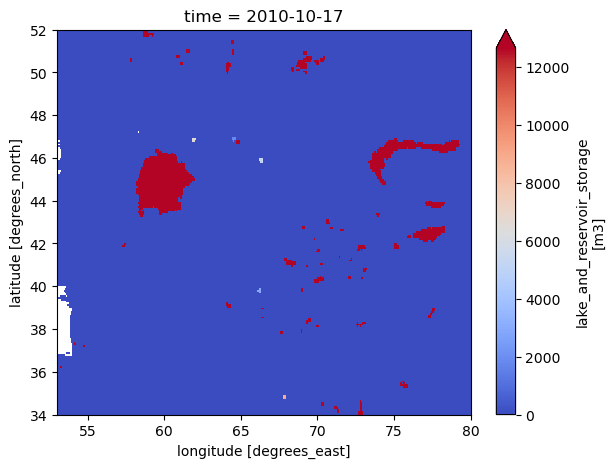

In [45]:
da = ds_lake["lake_and_reservoir_storage"].isel(time =-15)

da.plot(cmap="coolwarm", robust=True, size=5)

#plt.title(str(da["valid_time"].values))  # extract timestamp from coords
#plt.savefig('ERA5_pr_1988-12-22_21UTC.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


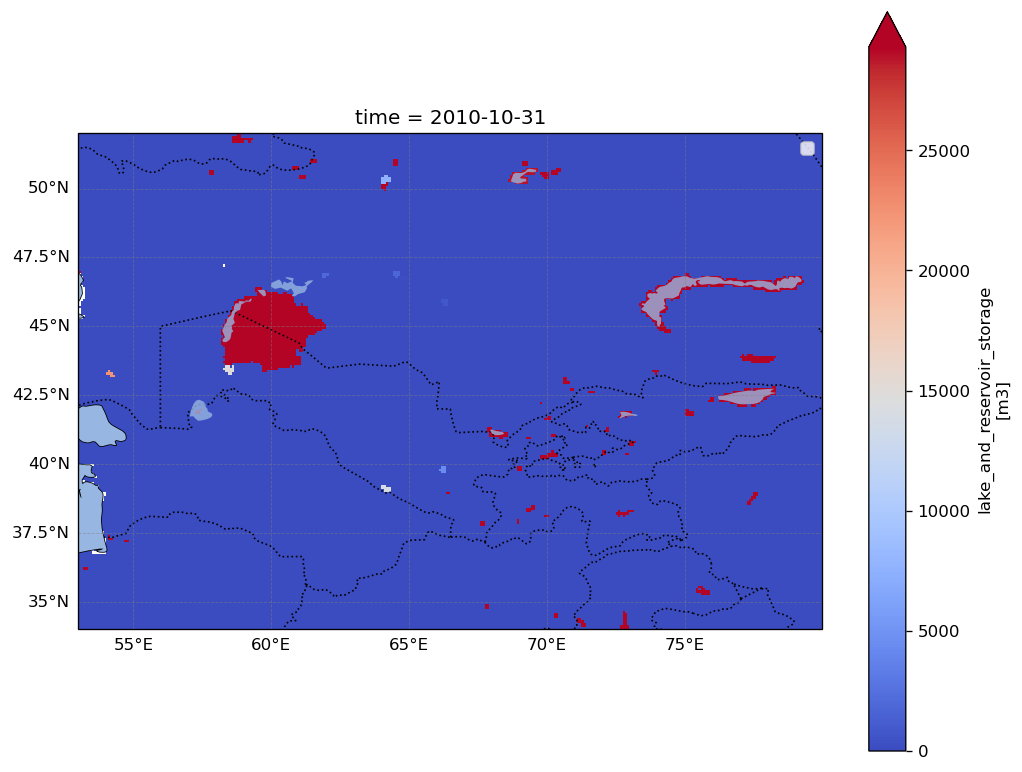

In [36]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Figure
fig = plt.figure(figsize=(10, 8), dpi=120)
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

da.plot(ax=ax, cmap="coolwarm", robust=True)
# Add features
ax.add_feature(cfeature.OCEAN, zorder=2)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAKES, alpha=0.8)
ax.add_feature(cfeature.COASTLINE)

# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False

# Legend
ax.legend()

plt.show()


In [37]:
da

<xarray.DataArray 'lake_and_reservoir_storage' (lat: 216, lon: 324)> Size: 280kB
[69984 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 8B 2010-10-31
  * lat      (lat) float32 864B 51.96 51.88 51.79 51.71 ... 34.21 34.12 34.04
  * lon      (lon) float32 1kB 53.04 53.12 53.21 53.29 ... 79.79 79.88 79.96
Attributes:
    standard_name:  lake_and_reservoir_storage
    long_name:      lake_and_reservoir_storage
    units:          m3

In [41]:
da_slice = ds_lake['lake_and_reservoir_storage'].sel(lat=45,lon=60, method="nearest")

In [42]:
da_slice

<xarray.DataArray 'lake_and_reservoir_storage' (time: 61)> Size: 244B
[61 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 488B 2010-09-01 2010-09-02 ... 2010-10-31
    lat      float32 4B 45.04
    lon      float32 4B 60.04
Attributes:
    standard_name:  lake_and_reservoir_storage
    long_name:      lake_and_reservoir_storage
    units:          m3

(0.0, 500000.0)

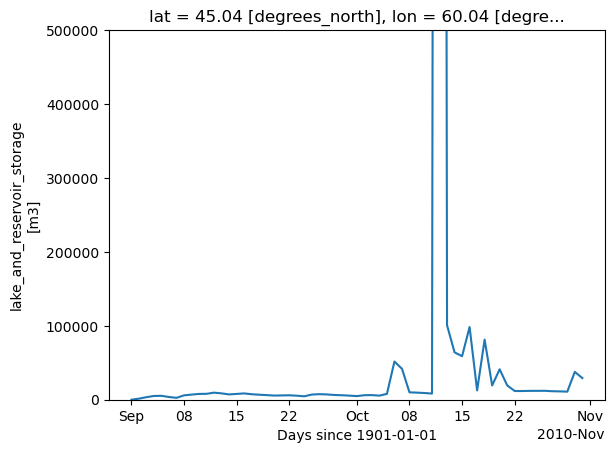

In [46]:
da_slice.plot()
plt.ylim(0, 0.5*1e6)